In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def midpoint_method(x_0, N, T, f, params, k = 1):

    Del = T / N
    A = [x_0.copy()]
    
    t = 0

    for i in range(N * k):
        k_t = x_0 + Del / 2 * f(t, x_0, params)
        x_0 += Del * f(t + Del / 2, k_t, params)
        A.append(x_0.copy())
        
        t += Del

    return A

In [77]:
def runge_kutta(x_0, N, T, f, params, k = 1):
    
    Del = T / N
    A = [x_0.copy()]
    
    t = 0
    
    for i in range(N * k):
        
        k1 = f(t, x_0, params)
        k2 = f(t + Del / 2, x_0 + Del * k1 / 2, params)
        k3 = f(t + Del / 2, x_0 + Del * k2 / 2, params)
        k4 = f(t + Del, x_0 + Del * k3, params)
        
        x_0 = x_0 + (k1 + 2 * k2 + 2 * k3 + k4) * Del / 6
        A.append(x_0.copy())
        
        t += Del
        
    return A
        

In [3]:
def rossler_2d(t, x, params):
    
    return np.array([2 * x[1], -2 * x[0] + (1 - x[0] ** 2) * x[1] / 2])

In [4]:
def rossler_linear_2d(t, x, params):
    
    if len(x) == 1:
        x = x[0]
    
    top = [0, 2]
    bot = [(-2 - x[0] * x[1]), ((1 - x[0] ** 2) / 2)]
    
    A = np.matrix([top, bot])
    
    return np.array(A @ x)[0]

In [5]:
def rossler_joint_2d(t, x, params):
    
    x_normal = x[:int(len(x) / 2)]
    x_linear = x[int(len(x) / 2):]
    
    f_x_normal = np.array([2 * x_normal[1], -2 * x_normal[0] + (1 - x_normal[0] ** 2) * x_normal[1] / 2])
    top = [0, 2]
    bot = [(-2 - x_normal[0] * x_normal[1]), ((1 - x_normal[0] ** 2) / 2)]
    A = np.matrix([top, bot])
    f_x_linear = np.array(A @ x_linear)[0]
    
    return np.concatenate((f_x_normal, f_x_linear))
    

In [6]:
def compute_poincare_2d(x_grid, f, N, epsilon):
    
    returns = []
    for x in x_grid:
        path = midpoint_method(np.array([x, 0]), N, 20, f, [])
        A = np.array(path)
        
        y = A[:,1]
        x = A[:,0]
        first_cross_index = np.where((abs(y) <= epsilon) & (1 <= x) & (x <= 3))[0]
        first_cross_index = first_cross_index[first_cross_index >= 100]
        first_cross_index = first_cross_index[0]
        returns.append(x[first_cross_index])
        
    return returns
        
        

In [7]:
x_grid = [1 + 0.01 * i for i in range(201)]

return_map = compute_poincare_2d(x_grid, rossler_2d, 10000, 0.01)

In [8]:
return_map

[1.5619186766405393,
 1.5699528486792027,
 1.577875377775467,
 1.5856629165585063,
 1.5933696626936098,
 1.6009692924331875,
 1.6084633362080267,
 1.6158533044725991,
 1.6231406873229293,
 1.6303269541542615,
 1.6374135533565073,
 1.644401912045545,
 1.6512934358285198,
 1.6580895086012972,
 1.6647914923763143,
 1.6714007271391305,
 1.6779185307320899,
 1.6843461987634312,
 1.690685004540392,
 1.6969361990248821,
 1.7031010108102314,
 1.7091806461177068,
 1.7151762888115958,
 1.721089100431448,
 1.7269202202404892,
 1.732670765288922,
 1.7383418304911096,
 1.7439344887156059,
 1.7494497908870297,
 1.754888766098888,
 1.7602790905443153,
 1.7655717802786404,
 1.7707913520572338,
 1.7759387500720647,
 1.7810148973357531,
 1.7860206958451932,
 1.7909570267506802,
 1.7958514869038924,
 1.800656504228704,
 1.8053948327090648,
 1.8100672726998663,
 1.8146746045873419,
 1.8192430230432703,
 1.823728675630208,
 1.828151706008251,
 1.8325128172911238,
 1.836812693578151,
 1.8410818766970298,
 1

Text(0.5, 1.0, 'Poincare Return Map')

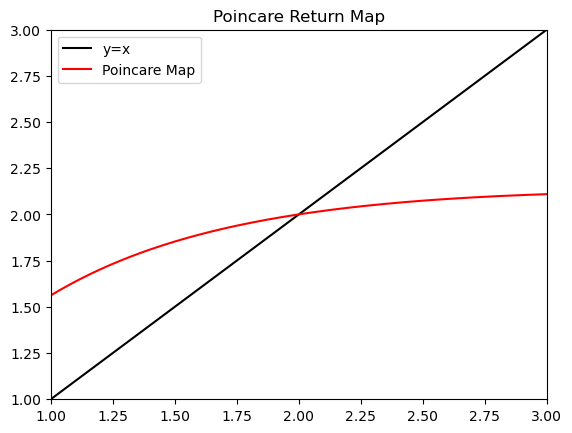

In [9]:
plt.plot(x_grid, x_grid, label = "y=x", color="black")
plt.plot(x_grid, return_map, label = "Poincare Map", color = "red")
plt.xlim([1,3])
plt.ylim([1,3])
plt.legend()
plt.title("Poincare Return Map")

In [10]:
df = pd.DataFrame({"P(x)" : np.array(return_map), "x" : np.array(x_grid)})

In [11]:
df

,P(x),x
0,1.561919,1.00
1,1.569953,1.01
2,1.577875,1.02
3,1.585663,1.03
4,1.593370,1.04
...,...,...
196,2.108043,2.96
197,2.108540,2.97
198,2.109007,2.98
199,2.109462,2.99


In [12]:
diff = np.array(df["P(x)"] - df["x"])
diff = abs(diff)
f_p_idx = np.argmin(diff)
print(x_grid[f_p_idx])
print((return_map[f_p_idx+1] - return_map[f_p_idx - 1]) / (x_grid[f_p_idx+1] - x_grid[f_p_idx-1]))

2.0
0.2053753606166019


The fixed point of this poincare map is approximately $x=2$

In [13]:
x_0_l = np.array([2.0,0.0,1.0,0.0])
x_0_r = np.array([2.0,0.0,0.0,1.0])

l_path = midpoint_method(x_0_l, 10000, 4, rossler_joint_2d, [])
A_l = np.array(l_path)

r_path = midpoint_method(x_0_r, 10000, 4, rossler_joint_2d, [])
A_r = np.array(r_path)

x_path = midpoint_method(np.array([2.0,0.0]), 10000, 4, rossler_2d, [])
A_x = np.array(x_path)

y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(y) <= 0.01) & (1 <= x) & (x <= 3))[0]
first_cross_index = first_cross_index[first_cross_index >= 100]
first_cross_index = first_cross_index[0]

print(first_cross_index)

M = np.transpose(np.vstack((A_l[first_cross_index][2:], A_r[first_cross_index][2:])))
print(M)

print(np.linalg.eig(M))
print(M @ np.array([2.0,0.0]))


7879
[[ 0.20335506 -0.00433474]
 [ 0.50264958  1.00349951]]
(array([0.20608747, 1.0007671 ]), array([[-0.84595753,  0.00543593],
       [ 0.53325028, -0.99998523]]))
[0.40671012 1.00529916]


In [1207]:
def compute_poincare_3d(y_grid, z_grid, f, params, N, epsilon):
    
    return_list = []
    
    for y in y_grid:
        for z in z_grid:
            x_0 = np.array([0, y, z])
            path = runge_kutta(x_0, N, 100, f, params)
            A = np.array(path)
            
            z_new = A[:,2]
            y_new = A[:,1]
            x_new = A[:,0]
            first_cross_index = np.where((abs(x_new) <= epsilon) & (abs(y_new - y) <= epsilon) & (abs(z_new - z) <= epsilon))[0]
            first_cross_index = first_cross_index[first_cross_index >= 100]
            
            if len(first_cross_index) > 0:
                return_list.append(x_0)
        
    return return_list  
        

In [135]:
def roessler_system_3d(t, x, params):
    
    a,b,c = params[0], params[1], params[2]
    
    return np.array([-x[1] - x[2], x[0] + a * x[1], b + x[2] * (x[0] - c)])

In [136]:
def joint_roesller_system_3d(t, x, params):
    
    a,b,c = params[0], params[1], params[2]
    
    x_normal = x[:int(len(x) / 2)]
    f_x_normal = roessler_system_3d(t, x_normal, params)
    
    x_linear = x[int(len(x) / 2):]
    
    A = [[0, -1, -1], [1, a, 0], [x_normal[2], 0, (x_normal[0]-c)]]
    
    A = np.matrix(A)
    
    f_x_linear = np.array(A @ x_linear)[0]
    
    return np.concatenate((f_x_normal, f_x_linear))
    

In [1604]:
y_grid = [(i / 100) for i in range(280,321)]
z_grid = [(i / 100) for i in range(170,191)]

params = [0.2, 0.2, 2.5]

fixed_point = compute_poincare_3d(y_grid, z_grid, roessler_system_3d, params, 1000, 0.01)


In [1605]:
fixed_point

[array([0.  , 3.02, 1.9 ]),
 array([0.  , 3.03, 1.88]),
 array([0.  , 3.04, 1.84]),
 array([0.  , 3.04, 1.85]),
 array([0.  , 3.04, 1.86]),
 array([0.  , 3.05, 1.83])]

In [1606]:
print(fixed_point[3])

[0.   3.04 1.85]


In [1608]:
x_0 = np.array(fixed_point[3])

path = midpoint_method(x_0, 10000, 20, roessler_system_3d, params)
A = np.array(path)
            

In [1609]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

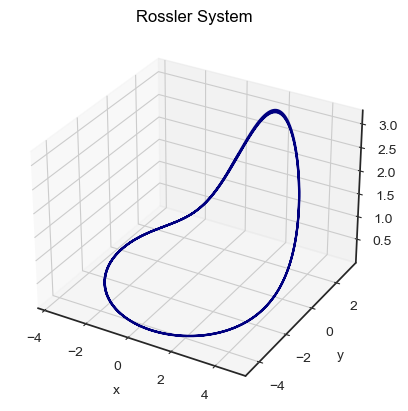

In [1610]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [628]:
x_0 = np.array(fixed_point)

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 10000, 40, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 10000, 40, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 10000, 40, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 100]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

eig = np.linalg.eig(M)[1][:,0]
print(eig)
print(M@eig)


[[ 1.22025597 -1.68340983 -0.4741745 ]
 [-0.23069986 -0.66524806  0.02073595]
 [ 1.31537527  1.22313468 -0.29829539]]
Eigenvalues
[ 1.01369031e+00 -7.56972537e-01 -5.26088437e-06]
Eigenvectors
[[ 0.74563901 -0.03935477  0.27959656]
 [-0.09430989 -0.31347176 -0.06710726]
 [ 0.65964241  0.94878167  0.95776948]]
[-5.99004697 -1.98419995  3.16946591]
[ 0.74563901 -0.09430989  0.65964241]
[ 0.75584704 -0.09560102  0.66867312]


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/274944133.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

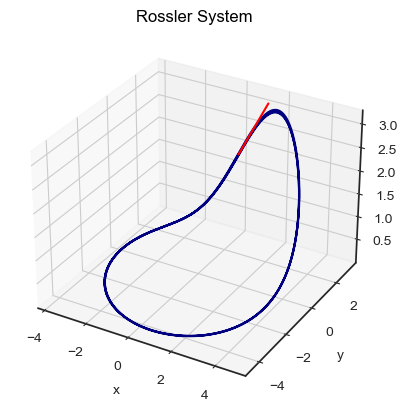

In [629]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.plot3D(np.array([x_0[0], x_0[0] + 2*eig[0]]), np.array([x_0[1], x_0[1] + 2*eig[1]]), np.array([x_0[2], x_0[2] + 2*eig[2]]),c="red")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [630]:
first_cross_index * 40 / 10000

5.748

In [631]:
params = [0.2, 0.2, 2.6]

x_0 = np.array(fixed_point)

path = midpoint_method(x_0, 10000, 20, roessler_system_3d, params)
A = np.array(path)
            

In [632]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [ ]:
# We need a new map!

/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

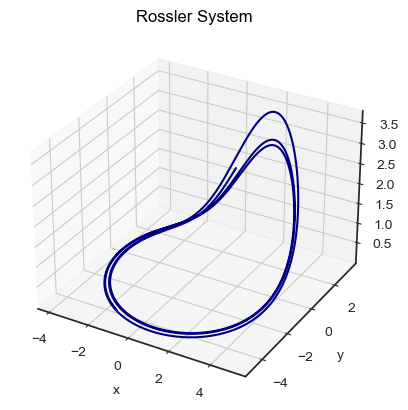

In [634]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [633]:
x_0 = np.array(fixed_point)

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 10000, 40, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 10000, 40, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 10000, 40, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 100]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

eig = np.linalg.eig(M)[1][:,0]
print(eig)
print(M@eig)


IndexError: index 0 is out of bounds for axis 0 with size 0

Try different parameters

In [936]:
y_grid = [(i / 100) for i in range(750,761)]
z_grid = [(i / 100) for i in range(55, 66)]

params = [0.2, 0.2, 6.0]

fixed_point = compute_poincare_3d(y_grid, z_grid, roessler_system_3d, params, 10000, 0.02)


KeyboardInterrupt: 

In [847]:
fixed_point

array([0.   , 6.345, 1.4  ])

In [848]:
print(fixed_point)

[0.    6.345 1.4  ]


In [938]:
x_0 = np.array([0.0, -10.815, 0.0])

path = midpoint_method(x_0, 10000, 40, roessler_system_3d, params)
A = np.array(path)
            

In [939]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

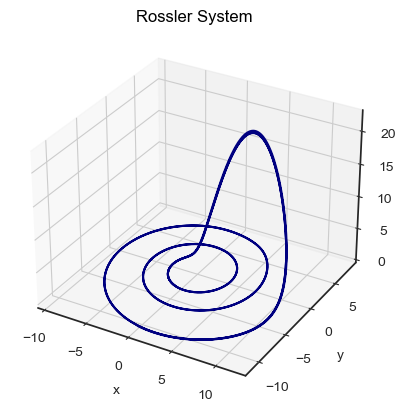

In [940]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [937]:
x_0 = np.array([0.0, -10.815, 0.0])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 10000, 40, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 10000, 40, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 10000, 40, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.1) & (abs(y - x_0[1]) <= 0.1) & (abs(z - x_0[2]) <= 0.1))[0]
first_cross_index = first_cross_index[first_cross_index >= 100]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

eig = np.linalg.eig(M)[1][:,0]
print(eig)
print(M@eig)



[[-2.84856080e-01 -6.30093244e+00  9.12924941e-01]
 [-6.85086191e-01 -1.95856095e+00  4.73162312e+00]
 [-1.16556044e-03 -2.11709025e-02  4.62164184e-03]]
Eigenvalues
[-3.33772059e+00  1.09892520e+00  4.55787872e-19]
Eigenvectors
[[-0.89975435 -0.97681259  0.99080228]
 [-0.43638589  0.21407369 -0.02553931]
 [-0.0030779  -0.00310115  0.13288562]]
[68.14458435 21.18183665  0.22896331]
[-0.89975435 -0.43638589 -0.0030779 ]
[3.00312861 1.45653417 0.01027318]


In [920]:
first_cross_index * 40 / 10000

17.552

Let us adjust:

In [827]:
y_grid = [(i / 1000) for i in range(5470,5475)]
z_grid = [(i / 100) for i in range(140,151)]

params = [0.1, 0.1, 3.0]

fixed_point = compute_poincare_3d(y_grid, z_grid, roessler_system_3d, params, 10000, 0.0154)



KeyboardInterrupt: 

In [455]:
fixed_point

array([0.   , 5.472, 1.5  ])

In [456]:
print(fixed_point)

[0.    5.472 1.5  ]


In [828]:
x_0 = np.array([0, -4.0, 0])

path = midpoint_method(x_0, 10000, 40, roessler_system_3d, params)
A = np.array(path)
            

In [829]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

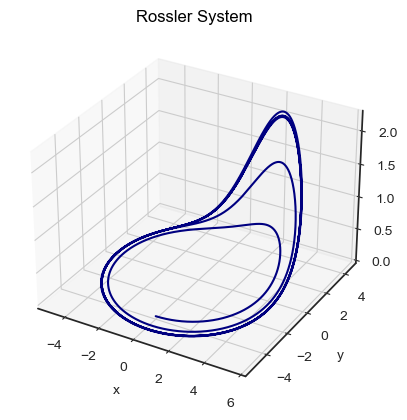

In [830]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [826]:
fixed_point = np.array([0, 6.345, 1.4])

x_0 = np.array(fixed_point)

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 100000, 40, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 100000, 40, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 100000, 40, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 100]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

eig = np.linalg.eig(M)[1][:,0]
print(eig)
print(M@eig)



IndexError: index 0 is out of bounds for axis 0 with size 0

In [462]:
first_cross_index * 40 / 10000

5.864

In [1615]:
# use this code to get a rough idea of how many fixed points we have

y_grid = [(i / 100) for i in range(-800, -199)]
z_grid = [0.05]

x_data = []
y_data = []

for c in range(25,61):
    
    print(c / 10)

    params = [0.2, 0.2, c / 10]
    
    lst = compute_poincare_3d(y_grid, z_grid, roessler_system_3d, params, 1000, 0.03)
    
    for i in range(len(lst)):
        x_data.append(c / 10)
        y_data.append(lst[i][1])
    
    print(len(lst))
    print(lst)


2.5
10
[array([ 0.  , -4.31,  0.05]), array([ 0.  , -4.3 ,  0.05]), array([ 0.  , -4.29,  0.05]), array([ 0.  , -4.28,  0.05]), array([ 0.  , -4.27,  0.05]), array([ 0.  , -4.26,  0.05]), array([ 0.  , -4.25,  0.05]), array([ 0.  , -4.24,  0.05]), array([ 0.  , -4.23,  0.05]), array([ 0.  , -4.22,  0.05])]
2.6
10
[array([ 0.  , -4.52,  0.05]), array([ 0.  , -4.51,  0.05]), array([ 0.  , -4.5 ,  0.05]), array([ 0.  , -4.49,  0.05]), array([ 0.  , -4.48,  0.05]), array([ 0.  , -4.47,  0.05]), array([ 0.  , -4.46,  0.05]), array([ 0.  , -4.45,  0.05]), array([ 0.  , -4.44,  0.05]), array([ 0.  , -4.43,  0.05])]
2.7
9
[array([ 0.  , -4.64,  0.05]), array([ 0.  , -4.63,  0.05]), array([ 0.  , -4.62,  0.05]), array([ 0.  , -4.61,  0.05]), array([ 0.  , -4.59,  0.05]), array([ 0.  , -4.58,  0.05]), array([ 0.  , -4.57,  0.05]), array([ 0.  , -4.56,  0.05]), array([ 0.  , -4.55,  0.05])]
2.8
35
[array([ 0.  , -4.89,  0.05]), array([ 0.  , -4.88,  0.05]), array([ 0.  , -4.87,  0.05]), array([ 0

1
[array([ 0.  , -3.97,  0.05])]
5.1
11
[array([ 0.  , -7.91,  0.05]), array([ 0.  , -7.7 ,  0.05]), array([ 0.  , -7.22,  0.05]), array([ 0.  , -7.1 ,  0.05]), array([ 0.  , -6.74,  0.05]), array([ 0.  , -6.48,  0.05]), array([ 0.  , -5.1 ,  0.05]), array([ 0.  , -5.09,  0.05]), array([ 0.  , -4.54,  0.05]), array([ 0.  , -4.05,  0.05]), array([ 0.  , -3.77,  0.05])]
5.2
16
[array([ 0.  , -7.31,  0.05]), array([ 0.  , -7.27,  0.05]), array([ 0.  , -6.9 ,  0.05]), array([ 0.  , -6.47,  0.05]), array([ 0.  , -6.46,  0.05]), array([ 0.  , -6.45,  0.05]), array([ 0.  , -6.44,  0.05]), array([ 0.  , -6.38,  0.05]), array([ 0.  , -6.37,  0.05]), array([ 0.  , -6.36,  0.05]), array([ 0.  , -6.35,  0.05]), array([ 0.  , -6.34,  0.05]), array([ 0.  , -6.33,  0.05]), array([ 0.  , -3.62,  0.05]), array([ 0.  , -3.61,  0.05]), array([ 0.  , -3.6 ,  0.05])]
5.3
11
[array([ 0.  , -6.81,  0.05]), array([ 0.  , -6.8 ,  0.05]), array([ 0.  , -6.26,  0.05]), array([ 0.  , -6.25,  0.05]), array([ 0.  ,

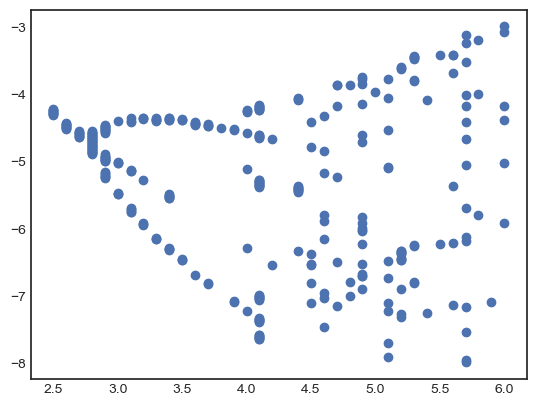

In [1619]:
plt.scatter(x_data, y_data)

It appears that we have a bifurcation at c = 2.9. Let us investigate further

In [1168]:
params = [0.2, 0.2, 2.9]

x_0 = np.array([0, -4.5, 0.05])

path = midpoint_method(x_0, 10000, 80, roessler_system_3d, params)
A = np.array(path)

In [1169]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


We have a period-doubling bifurcation

/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

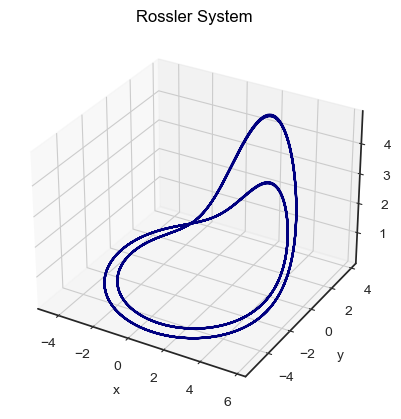

In [1170]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [1171]:
params = [0.2, 0.2, 2.9]

x_0 = np.array([0, -5.2, 0.05])

path = midpoint_method(x_0, 10000, 40, roessler_system_3d, params)
A = np.array(path)

In [1172]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

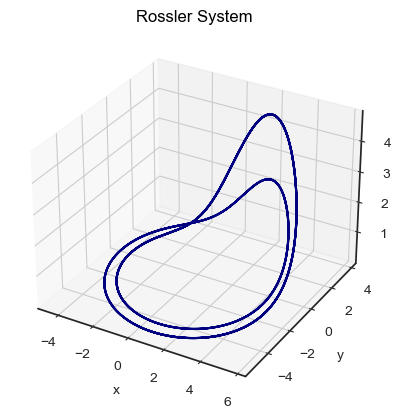

In [1173]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [1180]:
x_0 = np.array([0, -4.5, 0.05])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

params = [0.2, 0.2, 2.9]

l_path = midpoint_method(x_0_l, 1000000, 40, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 1000000, 40, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 1000000, 40, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.01) & (abs(y - x_0[1]) <= 0.01) & (abs(z - x_0[2]) <= 0.01))[0]
first_cross_index = first_cross_index[first_cross_index >= 1000]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

print(first_cross_index * 40 / 1000000)


[[ 1.08498379e+00  5.78636245e-02 -6.08162739e+00]
 [-1.86624084e-02  7.91917493e-01 -2.05148702e+00]
 [ 1.21638557e-02  2.37773692e-03 -7.28832707e-02]]
Eigenvalues
[2.05835349e-13 1.00813864e+00 7.95879372e-01]
Eigenvectors
[[-8.83350370e-01  9.82526152e-01 -1.98093550e-01]
 [-4.39908960e-01 -1.85819819e-01  9.80183114e-01]
 [-1.61778336e-01  1.06468478e-02 -9.08922348e-05]]
[-0.56446768 -3.66620307 -0.01434398]
11.52944


Perhaps the bifurcation is at c = 2.8. Let us investigate further

In [1181]:
params = [0.2, 0.2, 2.8]

x_0 = np.array([0, -4.5, 0.05])

path = midpoint_method(x_0, 10000, 80, roessler_system_3d, params)
A = np.array(path)

In [1182]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


We have a period-doubling bifurcation

/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

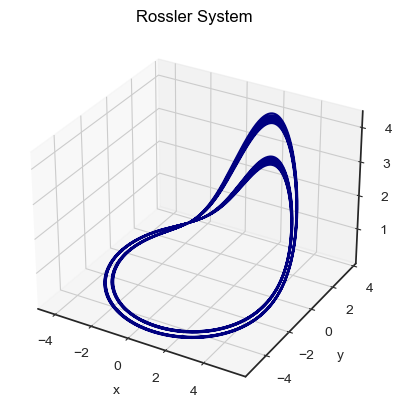

In [1183]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [1200]:
params = [0.2, 0.2, 2.8]

x_0 = np.array([0, -4.95, 0.05])

path = midpoint_method(x_0, 10000, 40, roessler_system_3d, params)
A = np.array(path)

In [1201]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

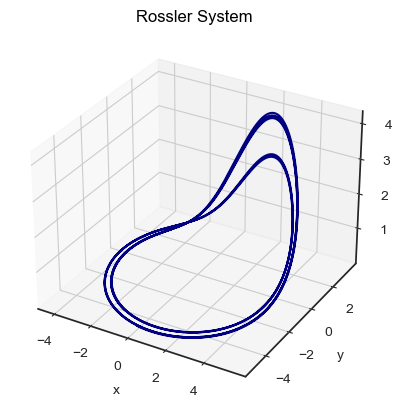

In [1202]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [1205]:
x_0 = np.array([0, -4.95, 0.05])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

params = [0.2, 0.2, 2.8]

l_path = midpoint_method(x_0_l, 100000, 40, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 100000, 40, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 100000, 40, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.05) & (abs(y - x_0[1]) <= 0.05) & (abs(z - x_0[2]) <= 0.05))[0]
first_cross_index = first_cross_index[first_cross_index >= 1000]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

print(first_cross_index * 40 / 100000)


[[ 9.92215412e-01 -3.44198418e-01 -5.60744909e+00]
 [ 4.72330204e-03  9.59274474e-01 -1.77939025e+00]
 [ 1.09933578e-02 -1.78965999e-03 -6.58199563e-02]]
Eigenvalues
[6.13953333e-13 8.68727686e-01 1.01694224e+00]
Eigenvectors
[[ 0.94934278  0.98538148  0.97148969]
 [ 0.27554777  0.16998949 -0.2368599 ]
 [ 0.15106859  0.0112658   0.0102551 ]]
[ 1.42340971 -4.83737816  0.00556782]
11.5148


Double again at $c=4.0$

In [1252]:
params = [0.2, 0.2, 4.0]

x_0 = np.array([0, -5.12, 0.05])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 100000, 100, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 100000, 100, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 100000, 100, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 1000]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

print(first_cross_index * 40 / 100000)



[[ 0.83153078 -0.82389844 -0.71474898]
 [-0.16966904  0.13691652  0.54739615]
 [ 0.00587776 -0.00586049 -0.00458005]]
Eigenvalues
[ 9.87132775e-01 -2.32655365e-02 -1.02879440e-17]
Eigenvectors
[[ 0.98148902 -0.69653002  0.72558293]
 [-0.19139235 -0.71750311  0.68606761]
 [ 0.00694819 -0.00593439  0.05329774]]
[ 4.18262257 -0.67364275  0.02977672]
18.5424


In [1500]:
params = [0.2, 0.2, 4.0]

x_0 = np.array([0, -5.1, 0.05])

path = midpoint_method(x_0, 10000, 100, roessler_system_3d, params)
A = np.array(path)

In [1501]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

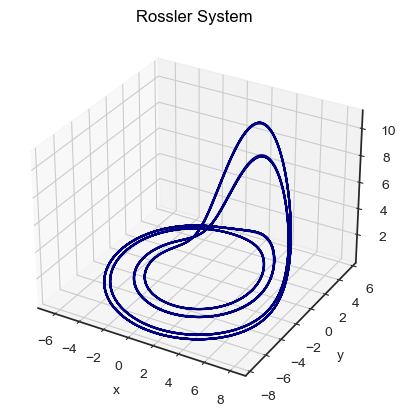

In [1502]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

Finally, let us consider the behavior of the system at $c=4.1$

In [1630]:
params = [0.2, 0.2, 5.5]

x_0 = np.array([0, -6.22, 0.05])

path = midpoint_method(x_0, 10000, 40, roessler_system_3d, params)
A = np.array(path)

In [1631]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

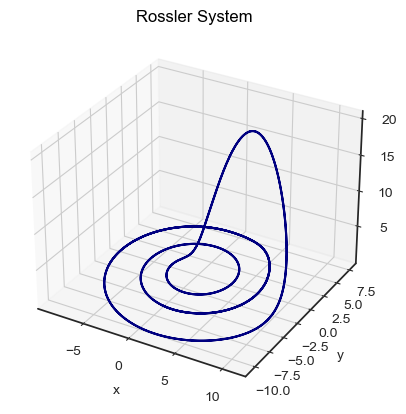

In [1632]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [1257]:
params = [0.2, 0.2, 5.5]

x_0 = np.array([0, -6.22, 0.05])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 100000, 100, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 100000, 100, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 100000, 100, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 1000]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

print(first_cross_index * 40 / 100000)




[[-6.06065586e-01 -8.18261548e+00  6.96597134e+00]
 [-8.84309329e-01 -3.52592036e+00  4.92969075e+00]
 [-3.42494889e-03 -4.10797765e-02  3.61545198e-02]]
Eigenvalues
[-5.08370297e+00  9.87871541e-01  3.73912221e-17]
Eigenvectors
[[-0.87563332 -0.98226147  0.93458028]
 [-0.48295589  0.18746101  0.18792886]
 [-0.00446081 -0.00455667  0.30206363]]
[65.72739623 28.41858822  0.33003514]
16.32


Looks like we overshot - $c=4.9$ is promising.

In [1288]:
params = [0.2, 0.2, 4.9]

x_0 = np.array([0, -4.22, 0.05])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 1000000, 100, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 1000000, 100, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 1000000, 100, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 1000]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

print(first_cross_index * 100 / 1000000)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [1285]:
params = [0.2, 0.2, 4.9]

x_0 = np.array([0, -4.22, 0.05])

path = midpoint_method(x_0, 10000, 100, roessler_system_3d, params)
A = np.array(path)

In [1286]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

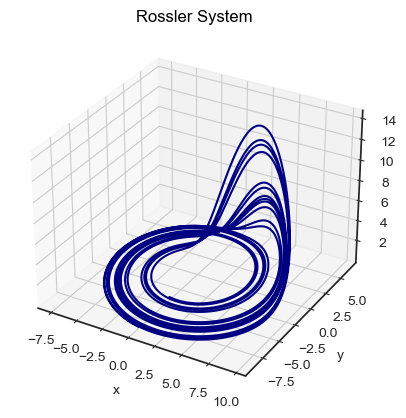

In [1287]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

At $c=5.0$, our system becomes chaotic

In [1347]:
params = [0.2, 0.2, 4.8]

x_0 = np.array([0, -7.76, 0.06])

path = midpoint_method(x_0, 10000, 100, roessler_system_3d, params)
A = np.array(path)

In [1348]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

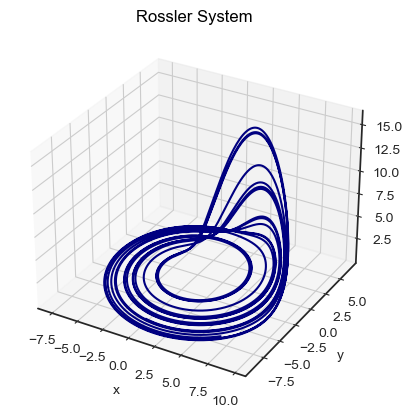

In [1349]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [1350]:
params = [0.2, 0.2, 4.8]

x_0 = np.array([0, -7.76, 0.05])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 100000, 1000, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 100000, 1000, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 100000, 1000, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 1000]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

print(first_cross_index * 100 / 1000000)



[[-4.83909228e+19 -2.48369063e+20  3.09913473e+20]
 [-4.11279200e+19 -2.11091303e+20  2.63398501e+20]
 [-2.66328963e+17 -1.36694800e+18  1.70566976e+18]]
Eigenvalues
[-2.57776556e+20 -7.32481349e+04 -8.26893532e+02]
Eigenvectors
[[ 0.76196653 -0.98278918 -0.98950068]
 [ 0.64760283  0.18464953  0.13759223]
 [ 0.00419363 -0.00547522 -0.04423556]]
[1.94283960e+21 1.65123844e+21 1.06927999e+19]
7.7561


In [1371]:
params = [0.2, 0.2, 4.1]

x_0 = np.array([0, -7.6, 0.05])

path = midpoint_method(x_0, 10000, 100, roessler_system_3d, params)
A = np.array(path)

In [1372]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

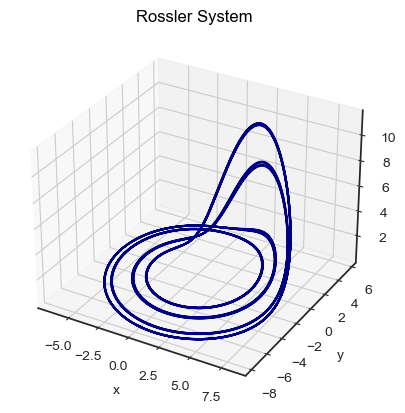

In [1373]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [1375]:
params = [0.2, 0.2, 4.1]

x_0 = np.array([0, -7.6, 0.05])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 100000, 1000, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 100000, 1000, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 100000, 1000, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 1000]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

print(first_cross_index * 100 / 100000)




[[ 6.49347186e-01 -1.73887388e+00 -3.83008703e+00]
 [-2.42047375e-01 -2.15725331e-01  1.99090058e+00]
 [ 3.73385151e-03 -1.07464681e-02 -2.15361850e-02]]
Eigenvalues
[ 9.65691820e-01 -5.53606150e-01 -1.05583823e-18]
Eigenvectors
[[ 0.98150961 -0.82801603  0.98802501]
 [-0.19132511 -0.56067732  0.0842652 ]
 [ 0.00579489 -0.00551358  0.12925156]]
[13.02393714  1.73905755  0.08059635]
6.96


In [1423]:
params = [0.2, 0.2, 4.12]

x_0 = np.array([0, -7.62, 0.05])

path = midpoint_method(x_0, 10000, 100, roessler_system_3d, params)
A = np.array(path)

In [1424]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

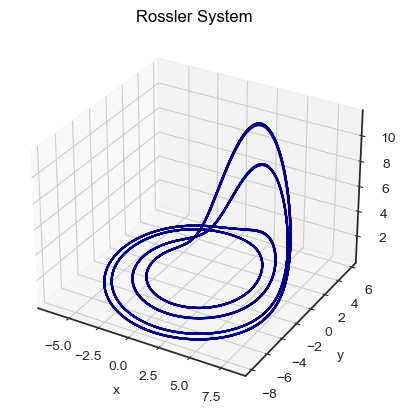

In [1425]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

In [1478]:
params = [0.2, 0.2, 4.12]

x_0 = np.array([0, -7.62, 0.05])

x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

l_path = midpoint_method(x_0_l, 100000, 100, joint_roesller_system_3d, params)
A_l = np.array(l_path)

m_path = midpoint_method(x_0_m, 100000, 100, joint_roesller_system_3d, params)
A_m = np.array(m_path)

r_path = midpoint_method(x_0_r, 100000, 100, joint_roesller_system_3d, params)
A_r = np.array(r_path)

z = np.array([A_r[i][2] for i in range(len(A_r))])
y = np.array([A_r[i][1] for i in range(len(A_r))])
x = np.array([A_r[i][0] for i in range(len(A_r))])
first_cross_index = np.where((abs(x - x_0[0]) <= 0.02) & (abs(y - x_0[1]) <= 0.02) & (abs(z - x_0[2]) <= 0.02))[0]
first_cross_index = first_cross_index[first_cross_index >= 1000]
first_cross_index = first_cross_index[0]

M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
print(M)

print("Eigenvalues")
print(np.linalg.eig(M)[0])
print("Eigenvectors")
print(np.linalg.eig(M)[1])
print(M @ x_0)

print(first_cross_index * 100 / 100000)


KeyboardInterrupt: 

In [1594]:
c_list = [2.5, 2.7, 2.8, 3.5, 3.9, 4.0, 4.1, 4.12, 5.5]
x_0_list = [-4.368, -4.625, -4.95, -6.46, -7.09, -5.1, -7.6, -7.62, -6.22]
eig_list1 = []
eig_list2 = []
eig_list3 = []
period_list = []

for i in range(len(c_list)):
    
    x_0 = np.array([0.0, x_0_list[i], 0.05])
    
    params = [0.2, 0.2, c_list[i]]
    
    x_0_l = np.concatenate((x_0.copy(),np.array([1.0,0.0,0.0])))
    x_0_m = np.concatenate((x_0.copy(),np.array([0.0,1.0,0.0])))
    x_0_r = np.concatenate((x_0.copy(),np.array([0.0,0.0,1.0])))

    l_path = midpoint_method(x_0_l, 100000, 100, joint_roesller_system_3d, params)
    A_l = np.array(l_path)

    m_path = midpoint_method(x_0_m, 100000, 100, joint_roesller_system_3d, params)
    A_m = np.array(m_path)

    r_path = midpoint_method(x_0_r, 100000, 100, joint_roesller_system_3d, params)
    A_r = np.array(r_path)

    z = np.array([A_r[i][2] for i in range(len(A_r))])
    y = np.array([A_r[i][1] for i in range(len(A_r))])
    x = np.array([A_r[i][0] for i in range(len(A_r))])
    first_cross_index = np.where((abs(x - x_0[0]) <= 0.05) & (abs(y - x_0[1]) <= 0.05) & (abs(z - x_0[2]) <= 0.05))[0]
    first_cross_index = first_cross_index[first_cross_index >= 1000]
    first_cross_index = first_cross_index[0]

    M = np.transpose(np.vstack((A_l[first_cross_index][3:], A_m[first_cross_index][3:], A_r[first_cross_index][3:])))
    print(M)

    print("Eigenvalues")
    print(np.linalg.eig(M)[0])
    print("Eigenvectors")
    print(np.linalg.eig(M)[1])
    print(M @ x_0)

    print(first_cross_index * 100 / 100000)
    period_list.append(first_cross_index * 100 / 100000)
    eig_list1.append(np.linalg.eig(M)[0][0])
    eig_list2.append(np.linalg.eig(M)[0][1])
    eig_list3.append(np.linalg.eig(M)[0][2])


[[ 0.51852022 -2.18738159  1.74081904]
 [-0.33089307 -0.31677231  3.12909249]
 [ 0.0059527  -0.0298215   0.03164056]]
Eigenvalues
[ 1.01798718e+00 -7.84593301e-01 -5.40520223e-06]
Eigenvectors
[[ 0.97692038 -0.85454317  0.93578003]
 [-0.21324684 -0.51922415  0.32692222]
 [ 0.01234318 -0.01273802  0.13205147]]
[9.64152373 1.54011608 0.13184232]
5.727
[[ 0.52204747 -2.23263614  1.6100788 ]
 [-0.34588899 -0.44238518  3.09504687]
 [ 0.00538017 -0.02750222  0.0263225 ]]
Eigenvalues
[ 1.01603173e+00 -9.10045522e-01 -1.41718615e-06]
Eigenvectors
[[ 0.97798583 -0.837976    0.93287529]
 [-0.20837553 -0.54559194  0.32702263]
 [ 0.01110682 -0.01120984  0.15099636]]
[10.40644609  2.20078381  0.12851387]
5.748
[[ 9.92211951e-01 -3.44394458e-01 -5.60709613e+00]
 [ 4.92443381e-03  9.59241695e-01 -1.78060378e+00]
 [ 1.09974764e-02 -1.79228491e-03 -6.58413626e-02]]
Eigenvalues
[6.13842310e-13 8.69116195e-01 1.01649609e+00]
Eigenvectors
[[ 0.94934284  0.9855864   0.9717867 ]
 [ 0.27554793  0.16879706 -0

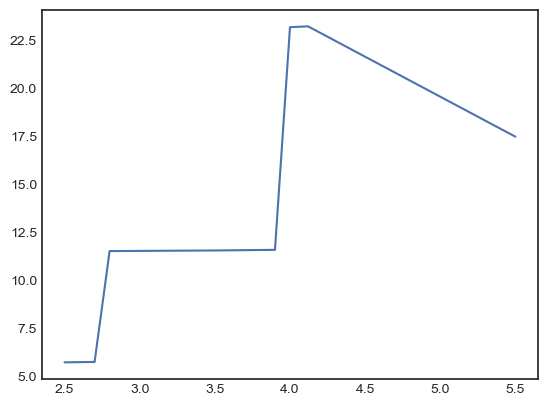

In [1595]:
plt.plot(c_list, period_list)

Text(0.5, 0, 'c')

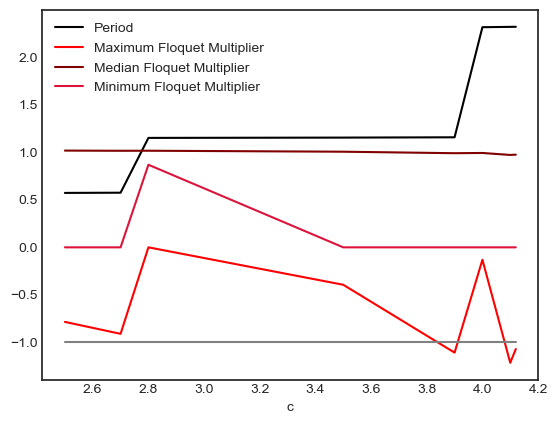

In [1629]:
plt.plot(np.array(c_list)[np.array(c_list) <= 4.5], np.array(period_list)[np.array(c_list) <= 4.5] / 10, label = "Period", color = "black")
plt.plot(np.array(c_list)[np.array(c_list) <= 4.5], np.array([min(eig_list1[i], eig_list2[i], eig_list3[i]) for i in range(len(eig_list1))])[np.array(c_list) <= 4.5], label = "Maximum Floquet Multiplier", color = "red")
plt.plot(np.array(c_list)[np.array(c_list) <= 4.5], np.array([max(eig_list1[i], eig_list2[i], eig_list3[i]) for i in range(len(eig_list1))])[np.array(c_list) <= 4.5], label = "Median Floquet Multiplier", color = "maroon")
plt.plot(np.array(c_list)[np.array(c_list) <= 4.5], np.array([np.median(np.array([eig_list1[i], eig_list2[i], eig_list3[i]])) for i in range(len(eig_list1))])[np.array(c_list) <= 4.5], label = "Minimum Floquet Multiplier", color = "crimson")
plt.plot(np.array(c_list)[np.array(c_list) <= 4.5], np.array([-1 for i in range(len(c_list))])[np.array(c_list) <= 4.5], color = "gray")
plt.legend()
plt.xlabel("c")

# plt.plot(c_list, eig_list2)
# plt.plot(c_list, eig_list3)

In [1591]:
params = [0.2, 0.2, 2.7]

x_0 = np.array([0, -4.625, 0.05])

path = midpoint_method(x_0, 10000, 100, roessler_system_3d, params)
A = np.array(path)

In [1592]:
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/1312804820.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


/var/folders/j8/9y_r1f8s3ljbq3hn5sdh40w00000gn/T/ipykernel_1538/2792384031.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


Text(0.5, 0, 'z')

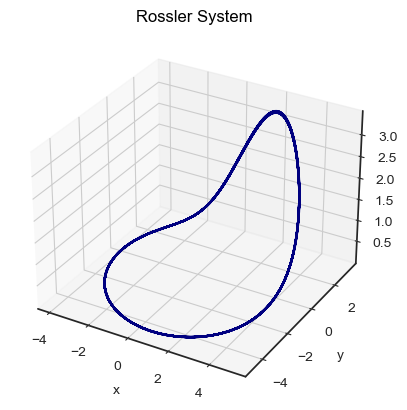

In [1593]:
df = pd.DataFrame(A)
df.columns = ['x','y','z']

plt.style.use('seaborn-deep')
ax = plt.axes(projection='3d')
ax.set_title('Rossler System',c='black')
ax.plot3D(df['x'], df['y'], df['z'], c='navy')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")